### Student Performance Indicator

##### Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

##### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

##### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

##### 2.1 Import Data and Required Packages
- Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

- Import the CSV Data as Pandas DataFrame


In [114]:
df = pd.read_csv('data/stud.csv')

- Show Top 5 Records


In [115]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


- Shape of the dataset

In [116]:
df.shape

(1000, 8)

#### 2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,- associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score   

In [117]:
for col in df.columns:
    print(col, ':', pd.unique(df[col]))

gender : ['female' 'male']
race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test preparation course : ['none' 'completed']
math score : [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score : [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score : [ 74  88  93 

#### 3. Data Checks to perform
- Check Missing Values
- Check Duplicates
- Check Datatype
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical column

#### 3.1 Check Missing Values

In [118]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### 3.2 Check duplicate values

In [119]:
df.duplicated().sum()

0

- There are no duplicate values in dataset

#### 3.3 Check Datatypes

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values in each column

In [121]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Check the statistics of dataset

In [122]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

#### 3.7 Exploring data

In [123]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [124]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [125]:
#define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### 3.8 Adding columns for "Total Score" and "Average"

In [126]:
df['Total_Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['Total_Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [127]:
math_full = df[df['math score']==100]['Average'].count()
reading_full = df[df['reading score']==100]['Average'].count()
writing_full = df[df['writing score']==100]['Average'].count()
print(f'Number of students with full marks in Maths : {math_full}')
print(f'Number of students with full marks in Reading : {reading_full}')
print(f'Number of students with full marks in Writing : {writing_full}')

Number of students with full marks in Maths : 7
Number of students with full marks in Reading : 17
Number of students with full marks in Writing : 14


In [128]:
math_less_20 = df[df['math score'] <= 20]['Average'].count()
reading_less_20 = df[df['reading score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing score'] <= 20]['Average'].count()
print(f'Number of students with less than 20 marks in Maths : {math_less_20}')
print(f'Number of students with less than 20 marks in Reading : {reading_less_20}')
print(f'Number of students with less than 20 marks in Writing : {writing_less_20}')

Number of students with less than 20 marks in Maths : 4
Number of students with less than 20 marks in Reading : 1
Number of students with less than 20 marks in Writing : 3


**Insights**
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

#### 4.Exploring Data (Visualization)

##### 4.1 Visualize average score distribution to make some conclusion
- Histogram
- Kernel distribution function (KDE)

##### 4.1.1 Histogram and KDE

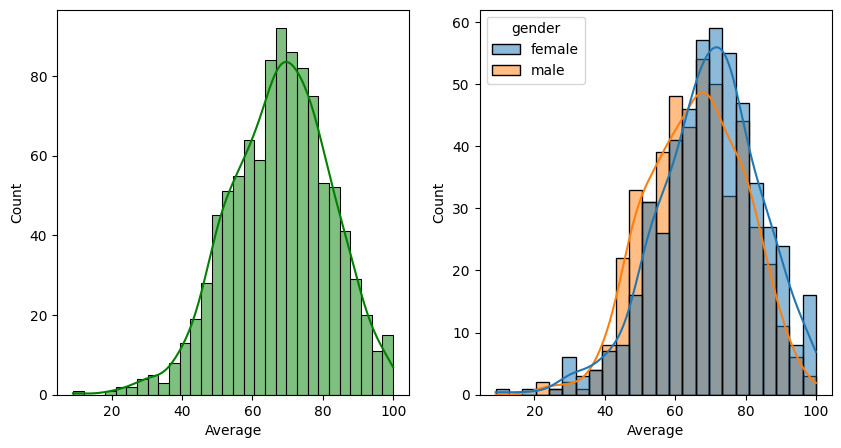

In [129]:
fig , axs = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True, hue='gender')
plt.show()

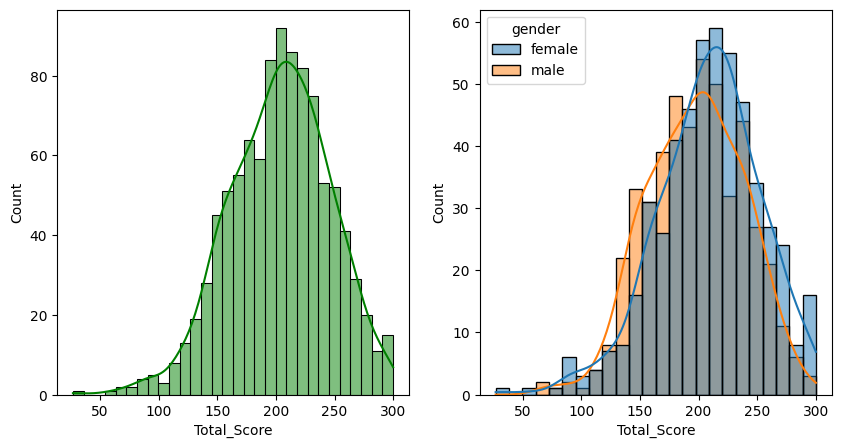

In [130]:
fig , axs = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(121)
sns.histplot(data=df, x='Total_Score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total_Score', kde=True, hue='gender')
plt.show()

**Insights**
- Female students tends to perform well then male students

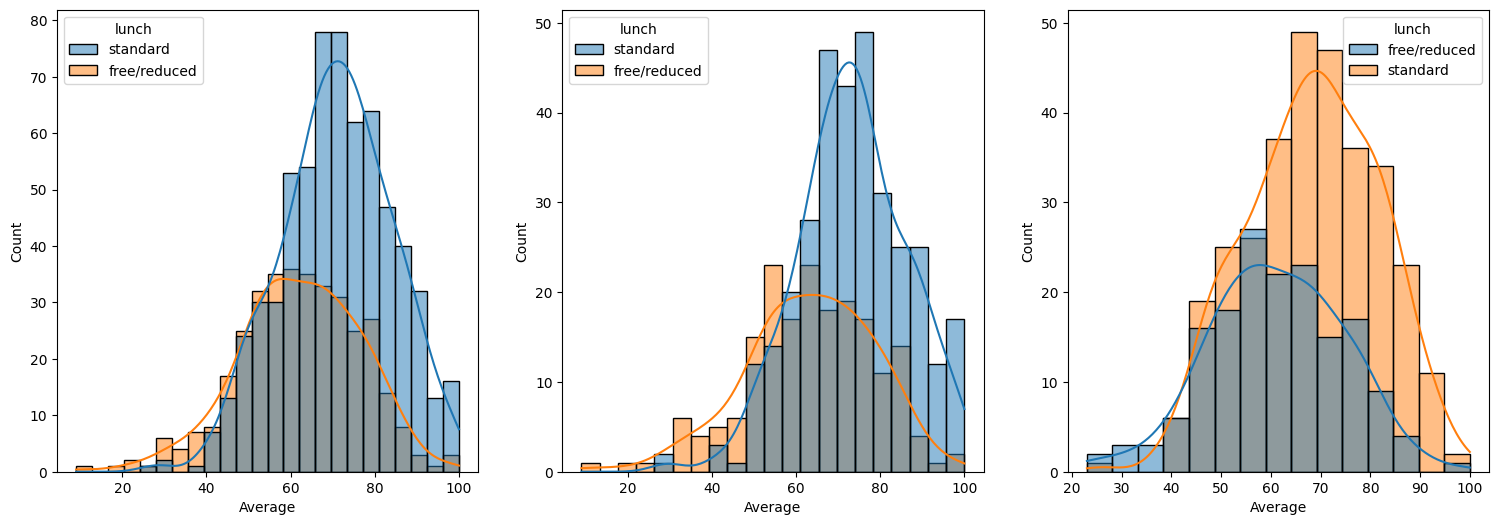

In [131]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average', kde=True, hue='lunch')
plt.show()

**Insights**
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

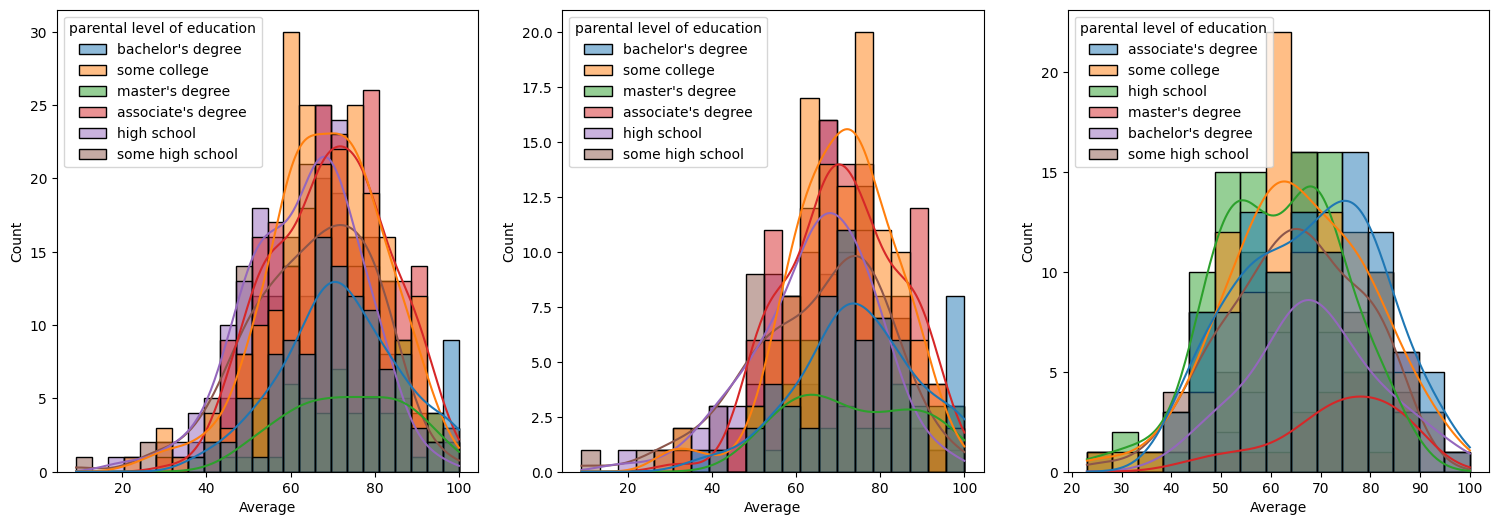

In [132]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average', kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average', kde=True, hue='parental level of education')
plt.show()

**Insights** 
- In general parent's education don't help student perform well in exam.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 2nd plot we can see there is no effect of parent's education on female students.

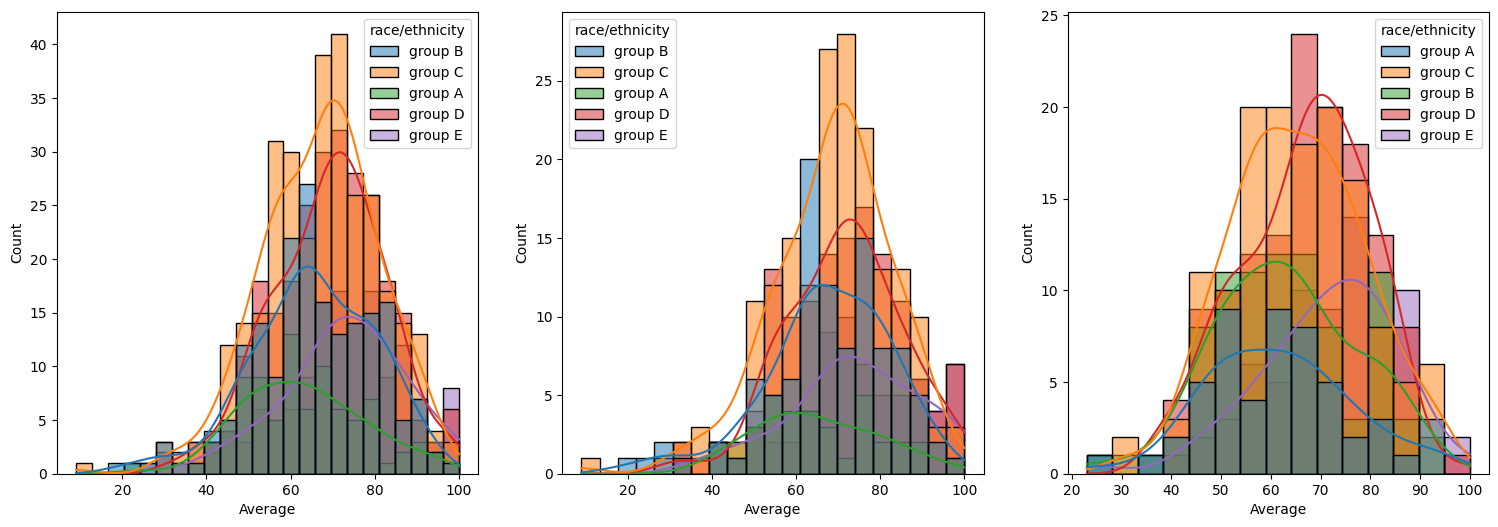

In [133]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average', kde=True, hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average', kde=True, hue='race/ethnicity')
plt.show()

**Insights**
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

##### 4.2 Maximum score of students in all three subjects

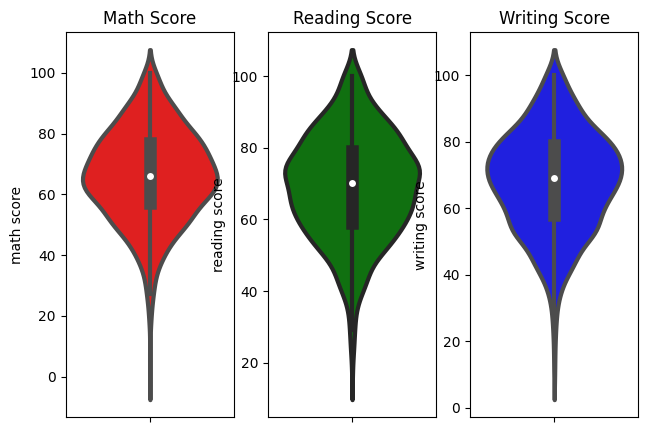

In [134]:
plt.figure(figsize = (10,5))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y = 'math score', data=df, color='red', linewidth=3)

plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(y = 'reading score', data=df, color='green', linewidth=3)

plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(y = 'writing score', data=df, color='blue', linewidth=3)

plt.show()

**Insights**
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

##### 4.3 Multivariate analysis using pieplot

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test preparation course
none         642
completed    358
Name: count, dtype: int64
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


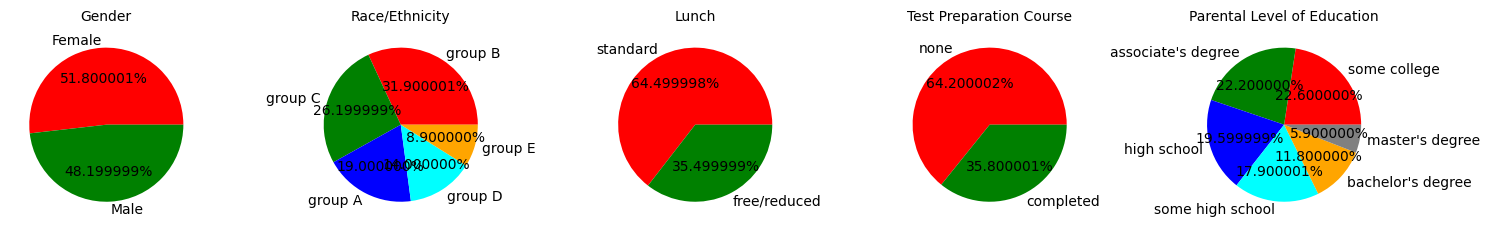

In [135]:
plt.rcParams['figure.figsize'] = (15,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = ['Female','Male']
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Gender', fontsize=10)
plt.axis('off')

#-------------------------------------------------

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
print(size)
labels = ['group B', 'group C', 'group A', 'group D', 'group E']
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Race/Ethnicity', fontsize=10)
plt.axis('off')

#-------------------------------------------------

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
print(size)
labels = ['standard', 'free/reduced']
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Lunch', fontsize=10)
plt.axis('off')

#-------------------------------------------------

plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
print(size)
labels = ['none' , 'completed']
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Test Preparation Course', fontsize=10)
plt.axis('off')

#-------------------------------------------------

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
print(size)
labels = [ 'some college' , "associate's degree" , 'high school' , 'some high school' , "bachelor's degree" , "master's degree"]
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Parental Level of Education', fontsize=10)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

**Insights**
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Featurewise visualization

#### 4.4.1 Gender Column

##### Univariate Analysis (How is distribution of gender?)

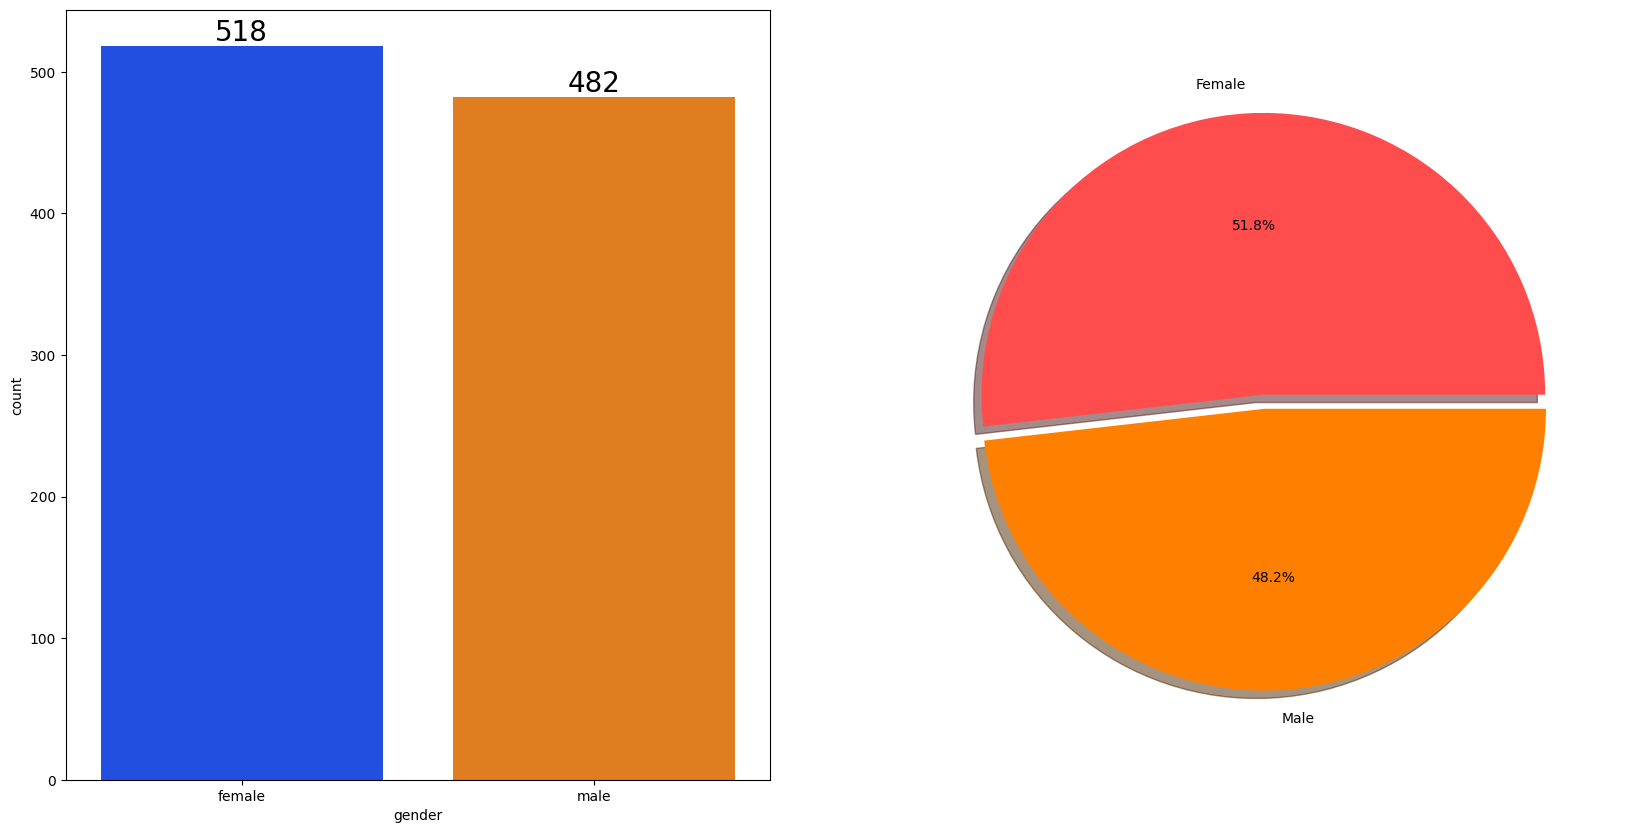

In [136]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.05],shadow=True,colors=['#ff4d4d','#ff8000'],autopct='%1.1f%%')

plt.show()

**Insights**
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

##### Bivariate Analysis (does gender has any impact on student's performance?)

In [144]:
gender_group = df.groupby(by=['gender']).mean(numeric_only=True)
gender_group.sort_values(by=['Average'],ascending=True)

,math score,reading score,writing score,Total_Score,Average
gender,,,,,
male,68.728216,65.473029,63.311203,197.512448,65.837483
female,63.633205,72.608108,72.467181,208.708494,69.569498


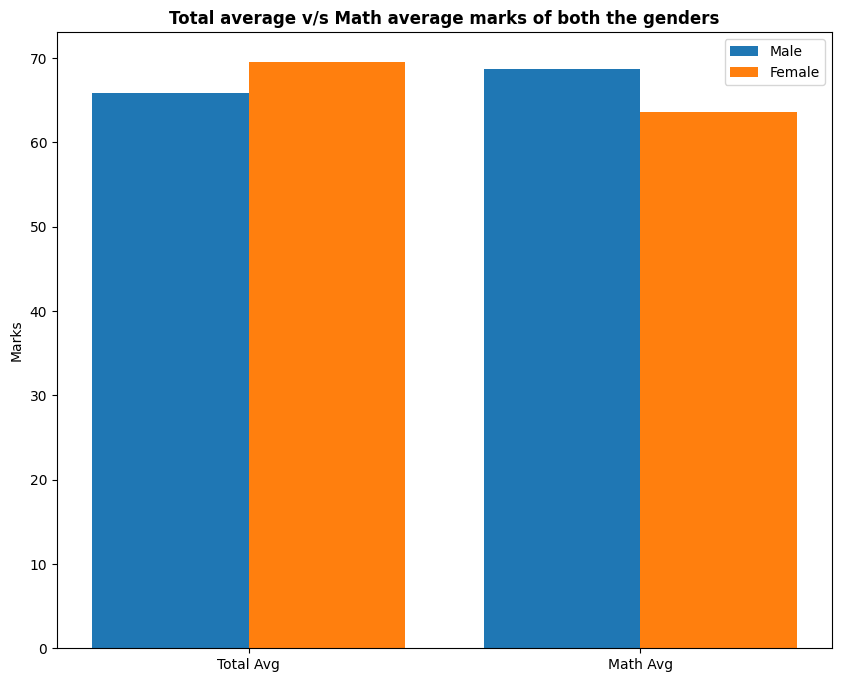

In [159]:
plt.figure(figsize=(10, 8))

X = ['Total Avg','Math Avg']


female_scores = [gender_group['Average'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()

plt.show()

**Insights**
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 Race/Ethnicity column

##### Univariate Analysis (How is Groupwise distribution?)

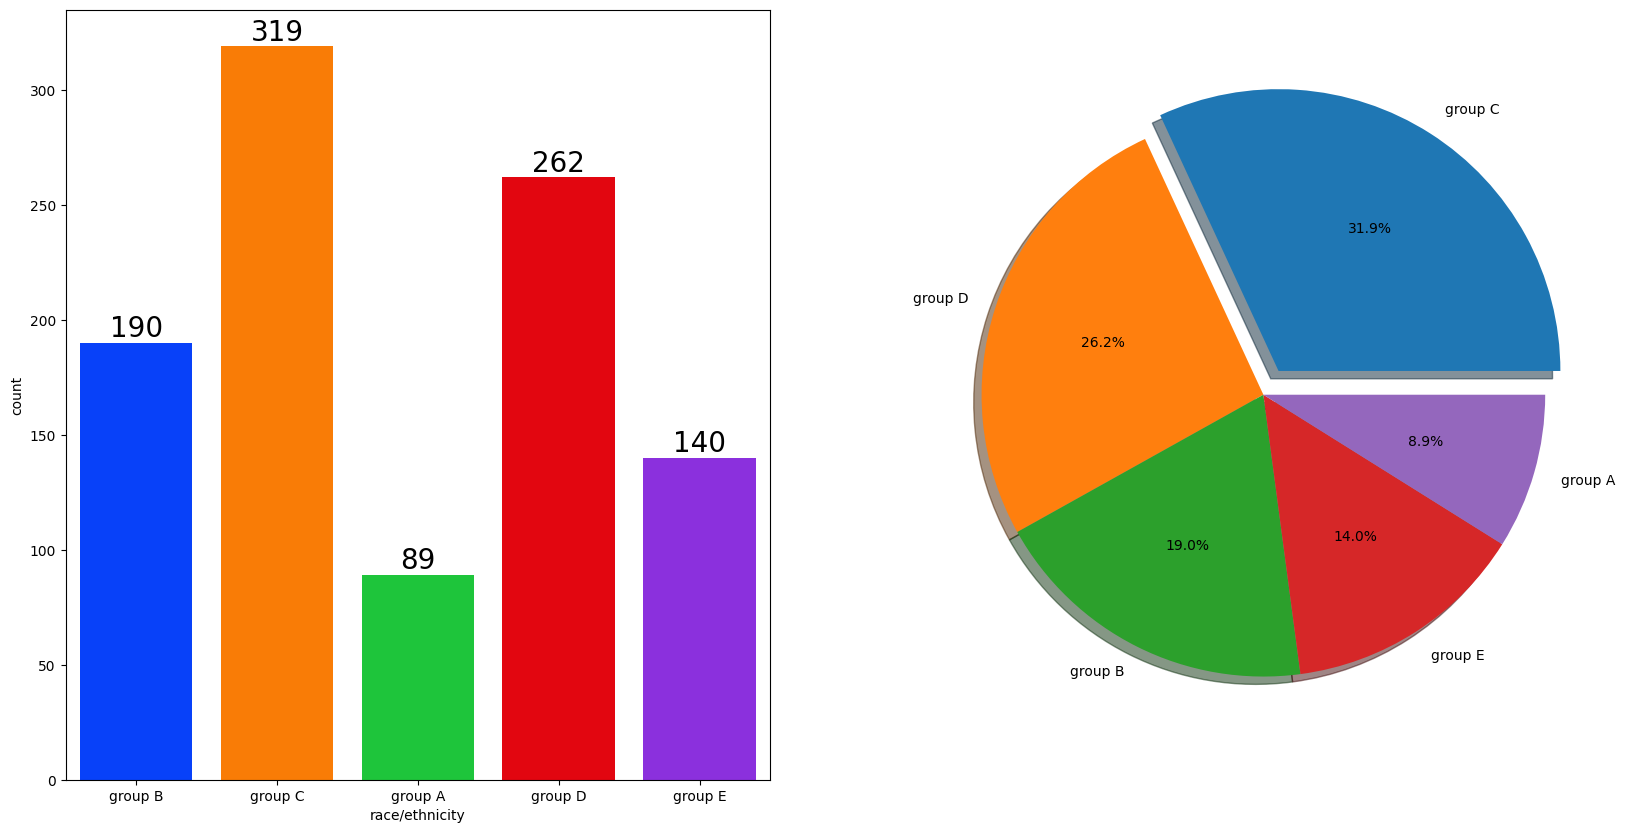

In [168]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race/ethnicity'].value_counts(),labels = df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)

plt.show()

**Insights**
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

##### Bivariate Analysis (Does Race/Ethnicity has any impact on student's performance?)

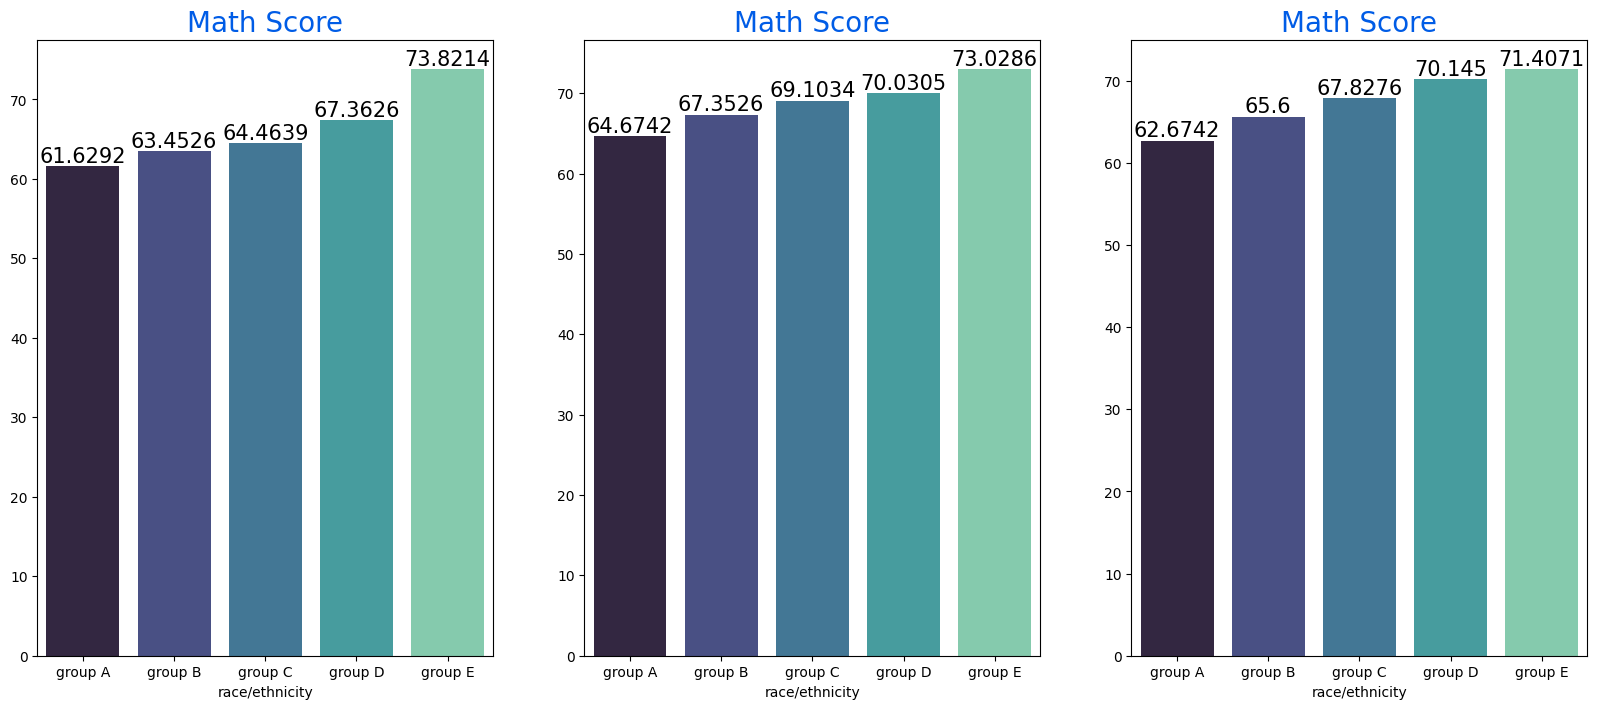

In [174]:
group_data = df.groupby('race/ethnicity')
f,ax = plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=group_data['math score'].mean().index,y=group_data['math score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_data['reading score'].mean().index,y=group_data['reading score'].mean().values,palette='mako',ax=ax[1])
ax[1].set_title('Math Score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data['writing score'].mean().index,y=group_data['writing score'].mean().values,palette='mako',ax=ax[2])
ax[2].set_title('Math Score',color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

plt.show()

**Insights**
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 Parental Level Of Education Column

##### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

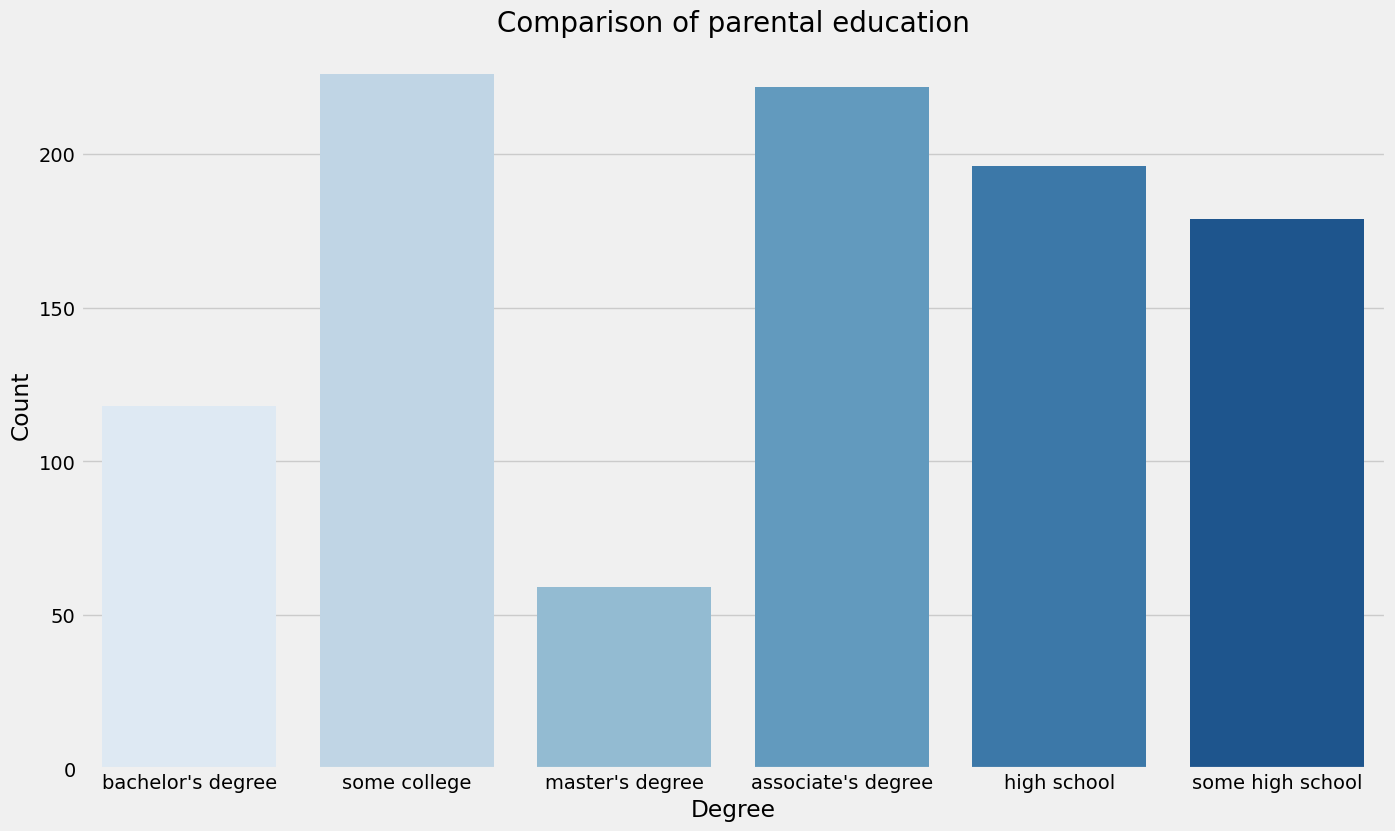

In [178]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental level of education'],data=df,palette='Blues')
plt.title('Comparison of parental education', fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

**Insights**
- Largest number of parents are from some college.

##### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

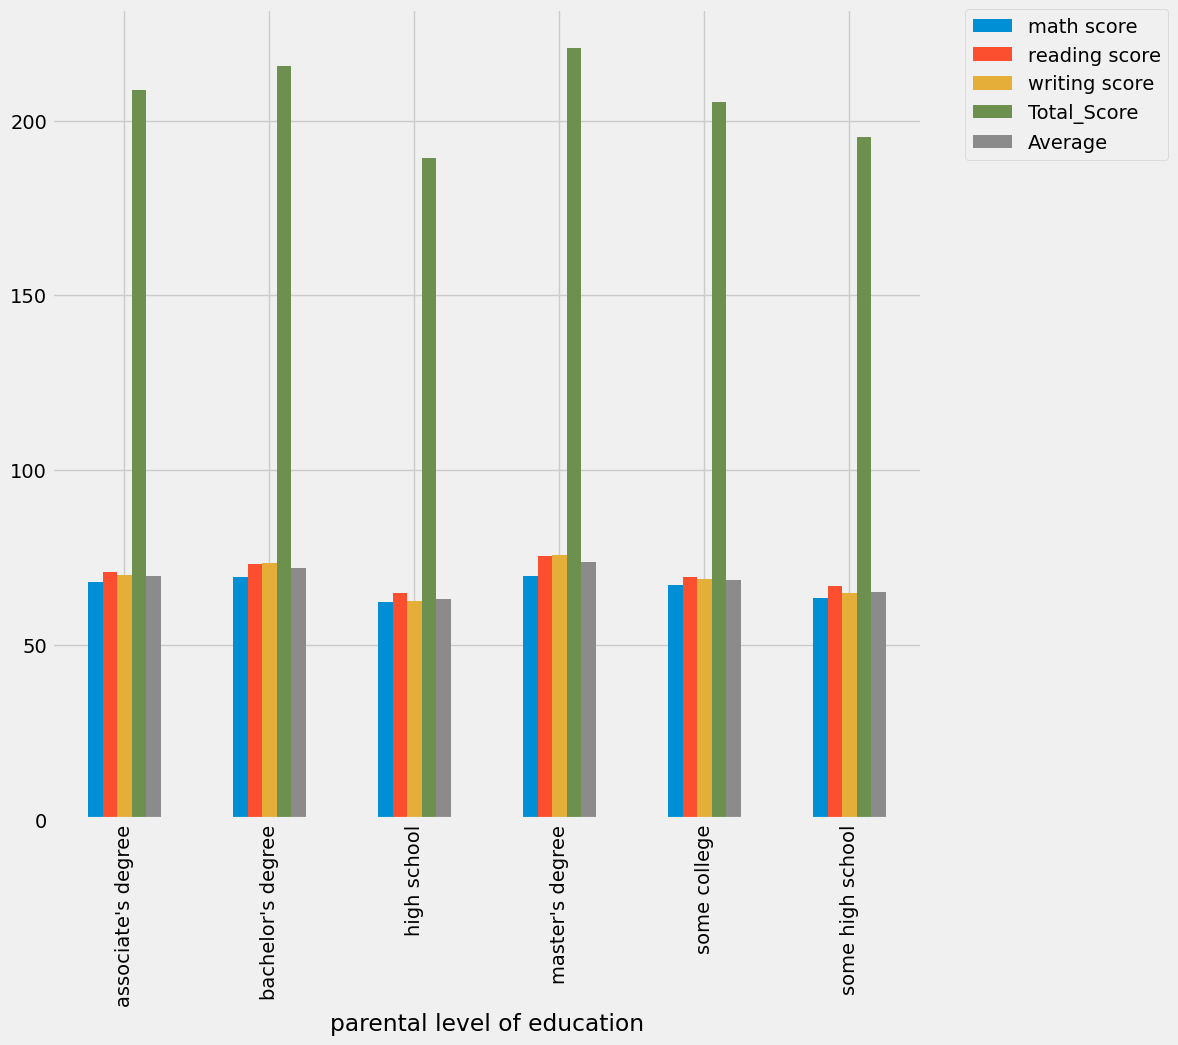

In [182]:
df.groupby('parental level of education').agg('mean',numeric_only=True).plot(kind='bar',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insights**
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 Lunch Column

##### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

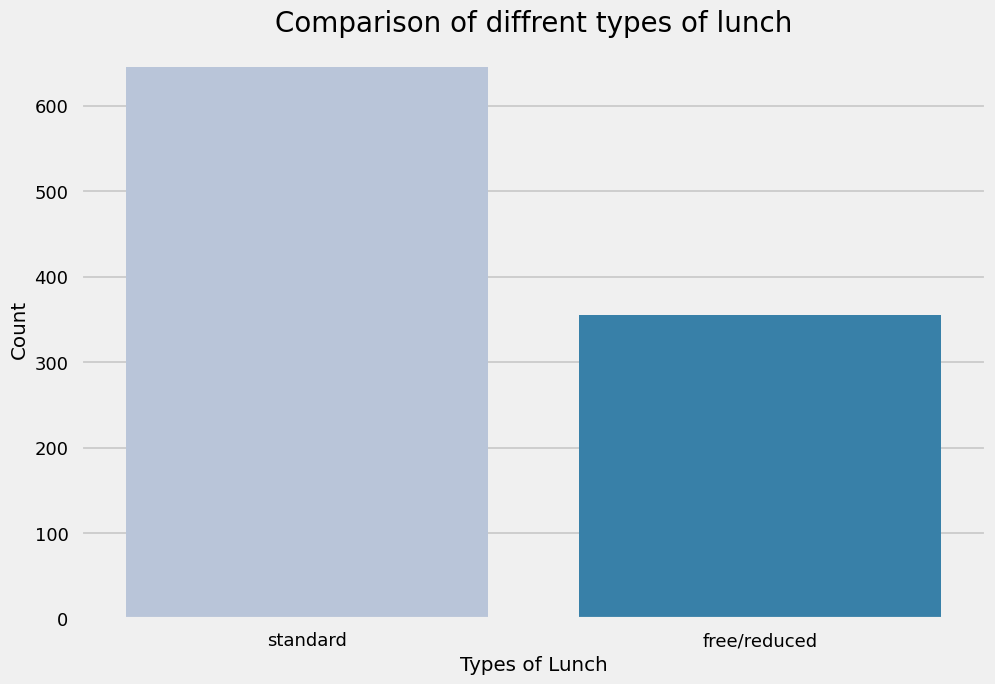

In [187]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'], palette='PuBu')
plt.title('Comparison of diffrent types of lunch',fontweight=30,fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

**Insights**
- Students being served Standard lunch was more than free lunch

##### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

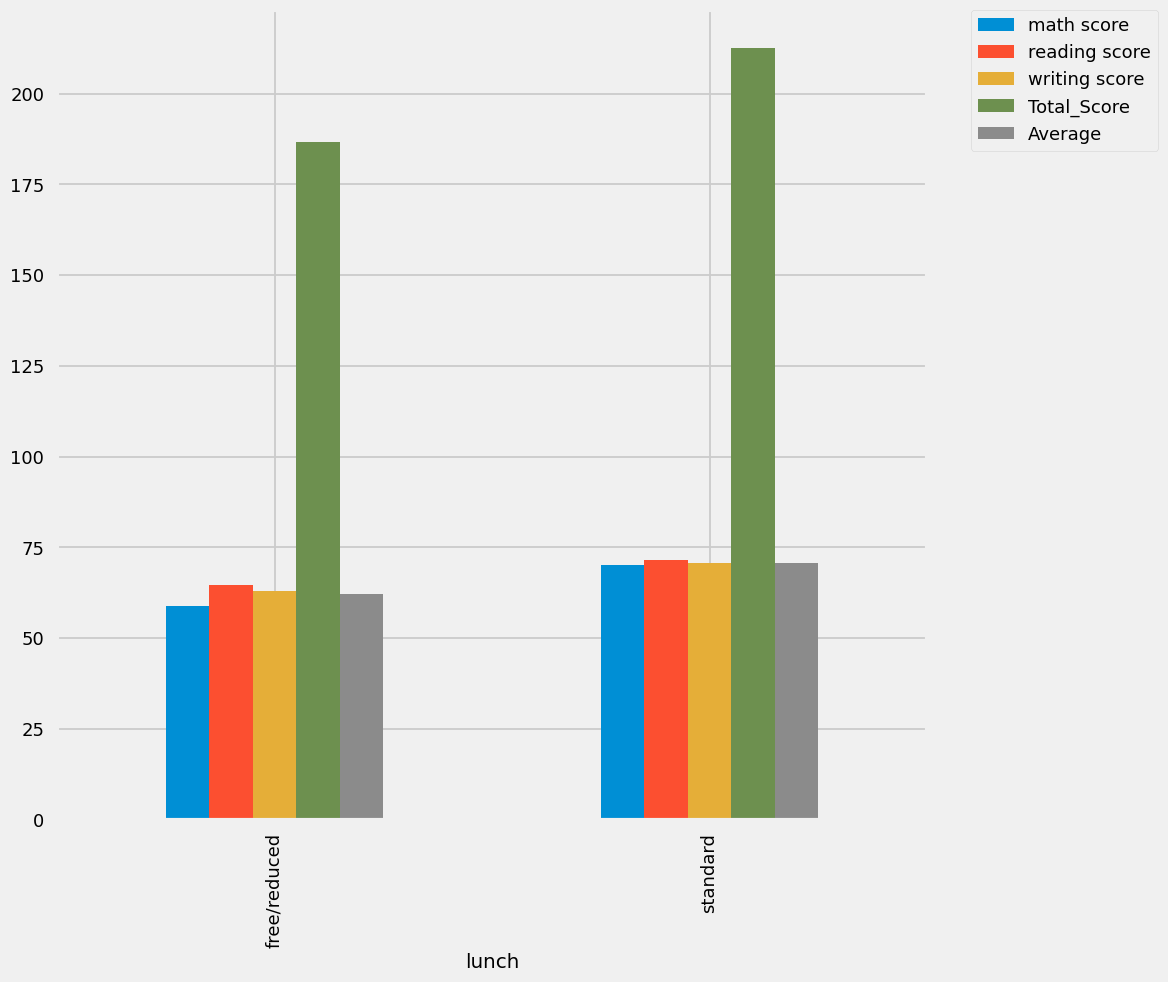

In [188]:
df.groupby('lunch').agg('mean',numeric_only=True).plot(kind='bar',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

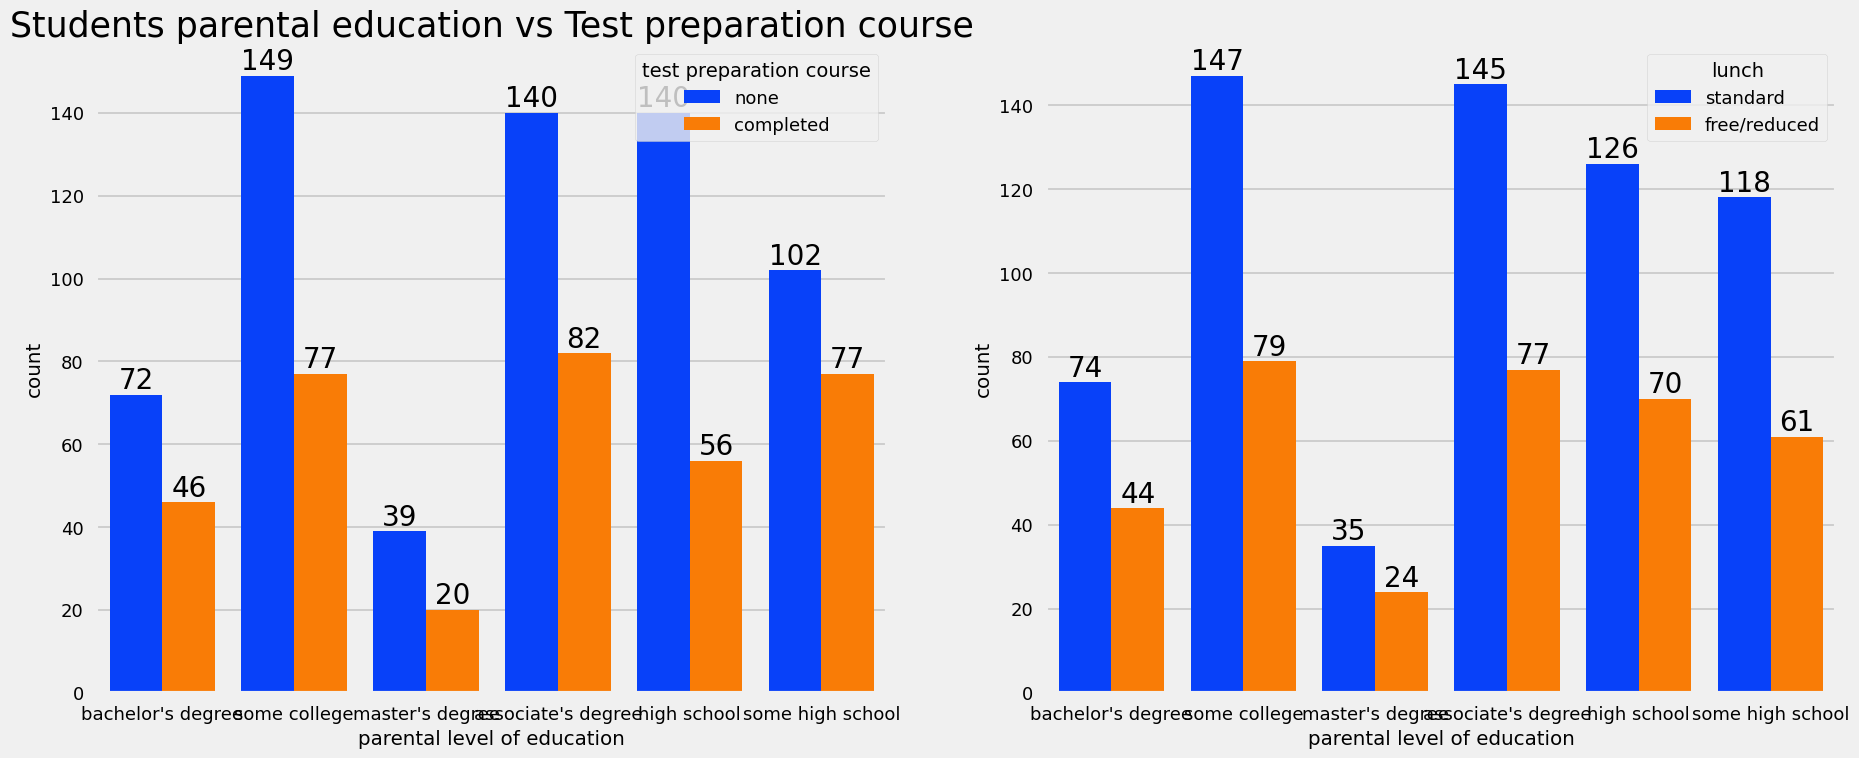

In [196]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette='bright',ax=ax[0],saturation=0.95,hue='test preparation course')
ax[0].set_title('Students parental education vs Test preparation course',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental level of education'],data=df,palette='bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)
plt.show()

#### 4.4.5 TEST PREPARATION COURSE COLUMN

##### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

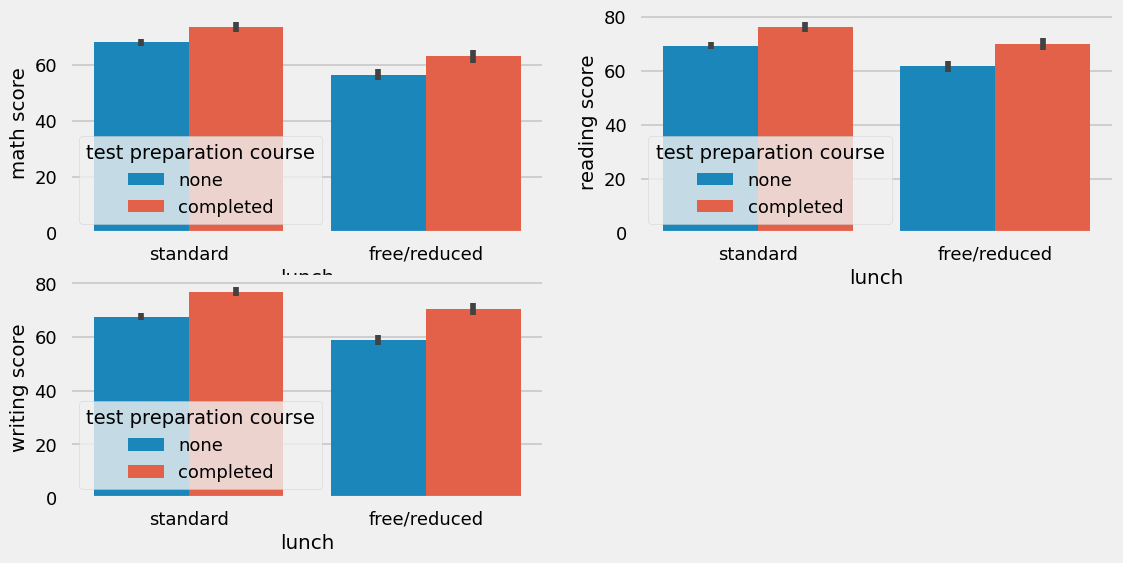

In [203]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math score'],hue=df['test preparation course'])

plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading score'],hue=df['test preparation course'])

plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing score'],hue=df['test preparation course'])

**Insights**
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 Checking Outliers

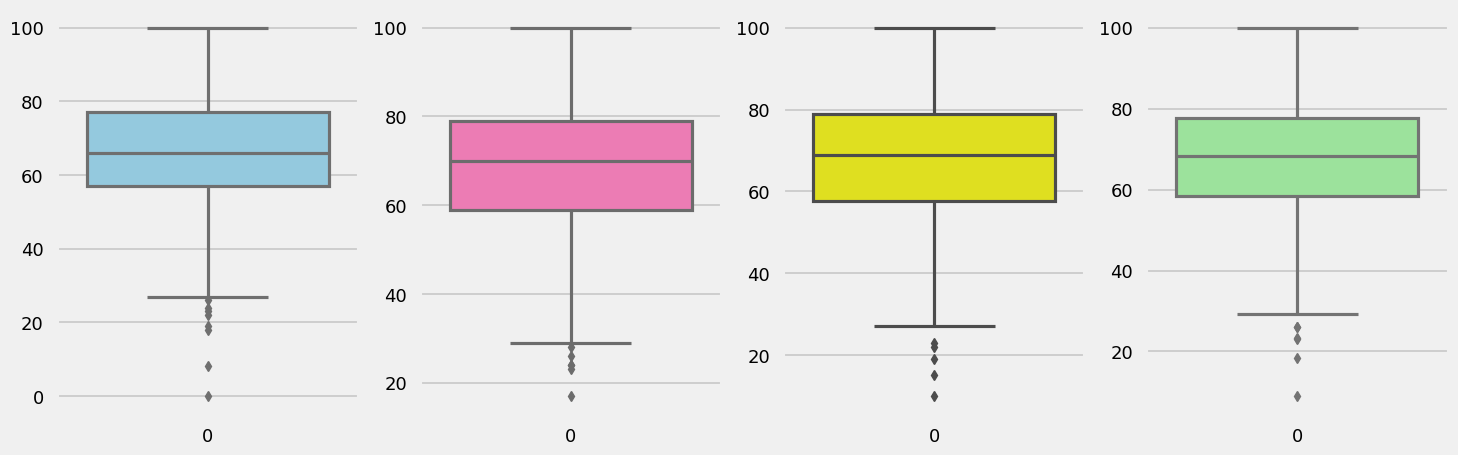

In [207]:
plt.subplots(1,4,figsize=(16,5))

plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')

plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')

plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')

plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')

plt.show()

#### 4.4.7 Multivariate Analysis Using Pairplot

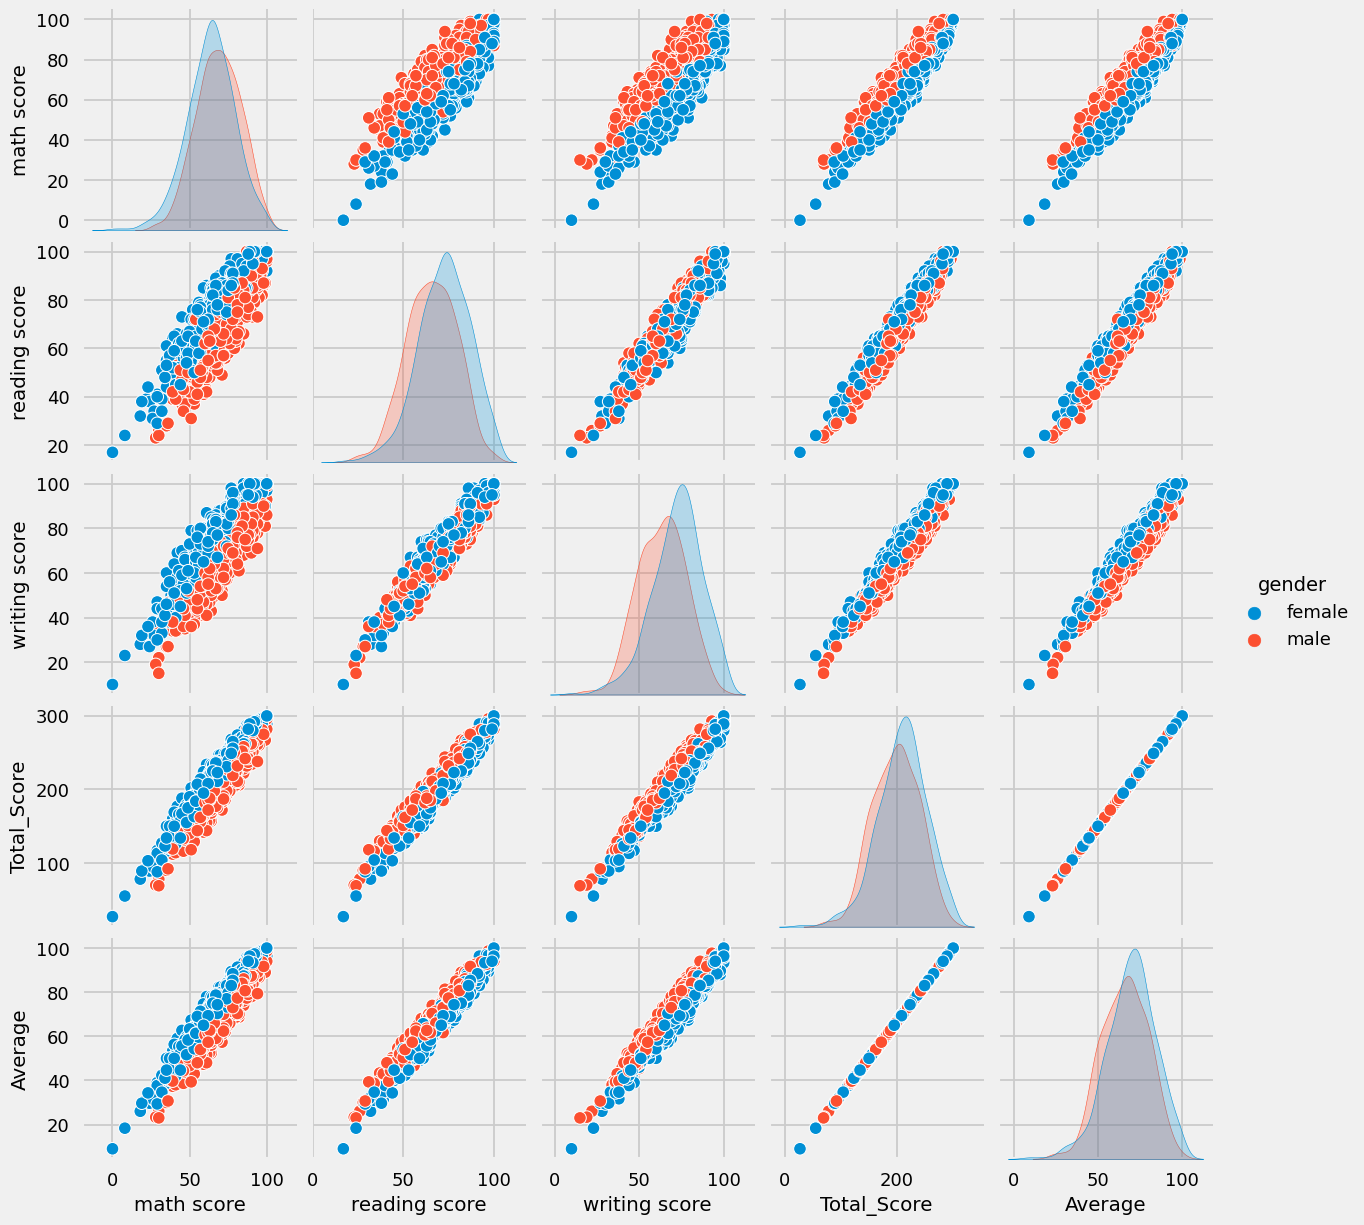

In [208]:
sns.pairplot(df,hue='gender')
plt.show()

**Insights**
- From the above plot it is clear that all the scores increase linearly with each other.


#### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.